#Аналіз Даних (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Завантаження датасету
df = pd.read_csv('data/internet_service_churn.csv')

#Загальна інформація про датасет

In [5]:
df.head(5) # Виведення перших 5 рядків

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [7]:
df.shape

(72274, 11)

In [22]:
# Виведення назв колонок
df.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

In [9]:
# Виведення транспонованої таблиці статистичних характеристик датасету
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


# Аналіз отриманого результату

In [11]:
# Виведення негативних значень
df[(df['subscription_age'] < 0)]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
69320,1621523,0,0,-0.02,0,0.08,0,32.6,1.3,0,1


Оскільки було виявлено лише один запис з негативним показником subscription_age то даний запис можна видалити. Це ніяк не вплине на навчання моделі

Для змінних із великими розмахами (bill_avg, download_avg, upload_avg) може бути корисна стандартизація.

Максимальні показники можуть бути використані у розробці інтерфейсу для обмеження під час введення даних нового клієнта.

In [33]:
# Перевірка на унікальність
df.nunique()

,0
id,72274
is_tv_subscriber,2
is_movie_package_subscriber,2
subscription_age,1110
bill_avg,179
reamining_contract,247
service_failure_count,19
download_avg,2856
upload_avg,802
download_over_limit,8


# is_tv_subscriber та is_movie_package_subscriber приймаєть лише значення 0 та 1, можуть бути віднесені до категоріальних змінних.

In [17]:
df['churn'].value_counts()

,count
churn,
1,40050
0,32224


In [16]:
# Виявлення відсутніх значень
missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': ((df.isnull().sum() / len(df)) * 100).round(2)
})
missing_summary.sort_values(by='Missing Count', ascending=False)

,Missing Count,Missing Percentage
reamining_contract,21572,29.85
download_avg,381,0.53
upload_avg,381,0.53
id,0,0.00
is_tv_subscriber,0,0.00
is_movie_package_subscriber,0,0.00
subscription_age,0,0.00
bill_avg,0,0.00
service_failure_count,0,0.00
download_over_limit,0,0.00


# Найбільше відсуніх значень має reamining_contract, це ті клієнти які не мали контракту, тому доцільно буде замінити відсутні значення на нуль. Відсутність одинакової кількості значень в download_avg та upload_avg та їх невеликий % від загальної кількості, а саме 0,53 % говорить про те що ці пропуски можна видалити.

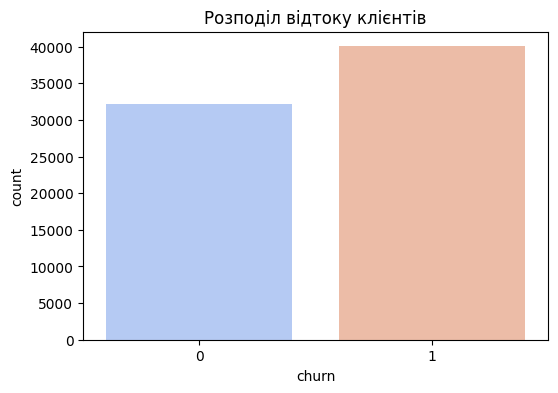

In [24]:
# Візуалізація розподілу цільової змінної
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette='coolwarm')
plt.title('Розподіл відтоку клієнтів')
plt.show()

In [49]:
# Розділяємо бінарні та безперервні змінні
continuous_columns = ['subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit']
binary_columns = ['is_tv_subscriber', 'is_movie_package_subscriber']

<Figure size 1500x1500 with 0 Axes>

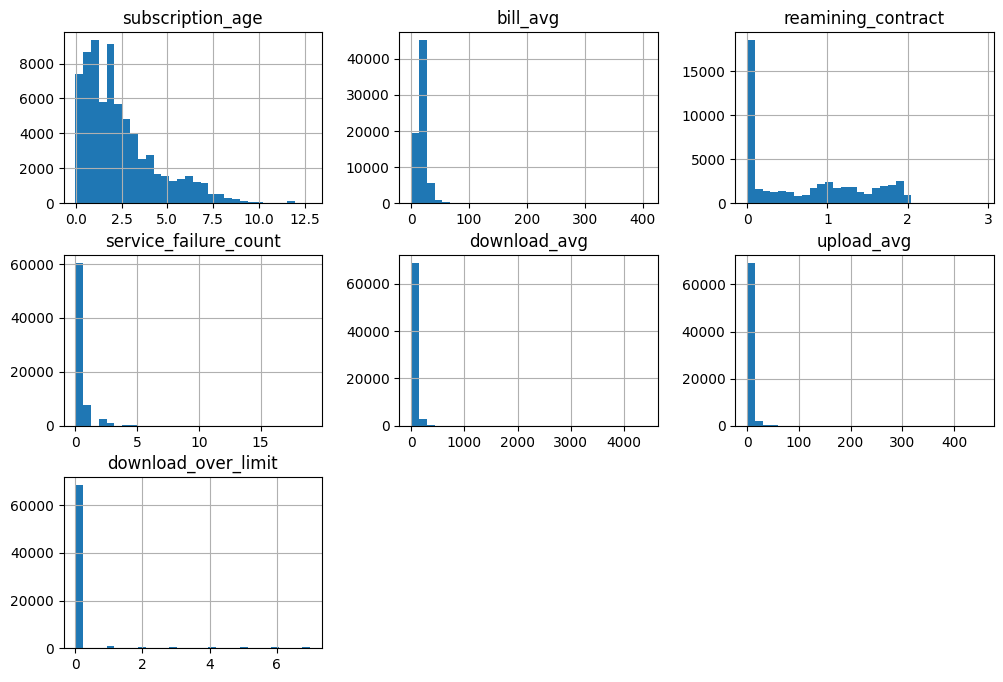

In [51]:
# Візуалізація безперервних числових змінних
if continuous_columns:
    plt.figure(figsize=(15, 15))
    df[continuous_columns].hist(bins=30, figsize=(12, 8))
    plt.show()

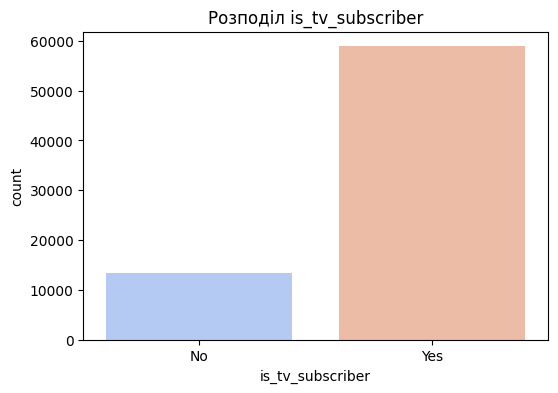

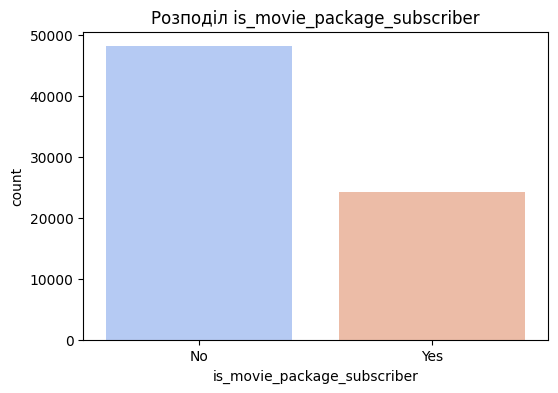

In [29]:
# Візуалізація бінарних змінних
for col in binary_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='coolwarm')
    plt.title(f'Розподіл {col}')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

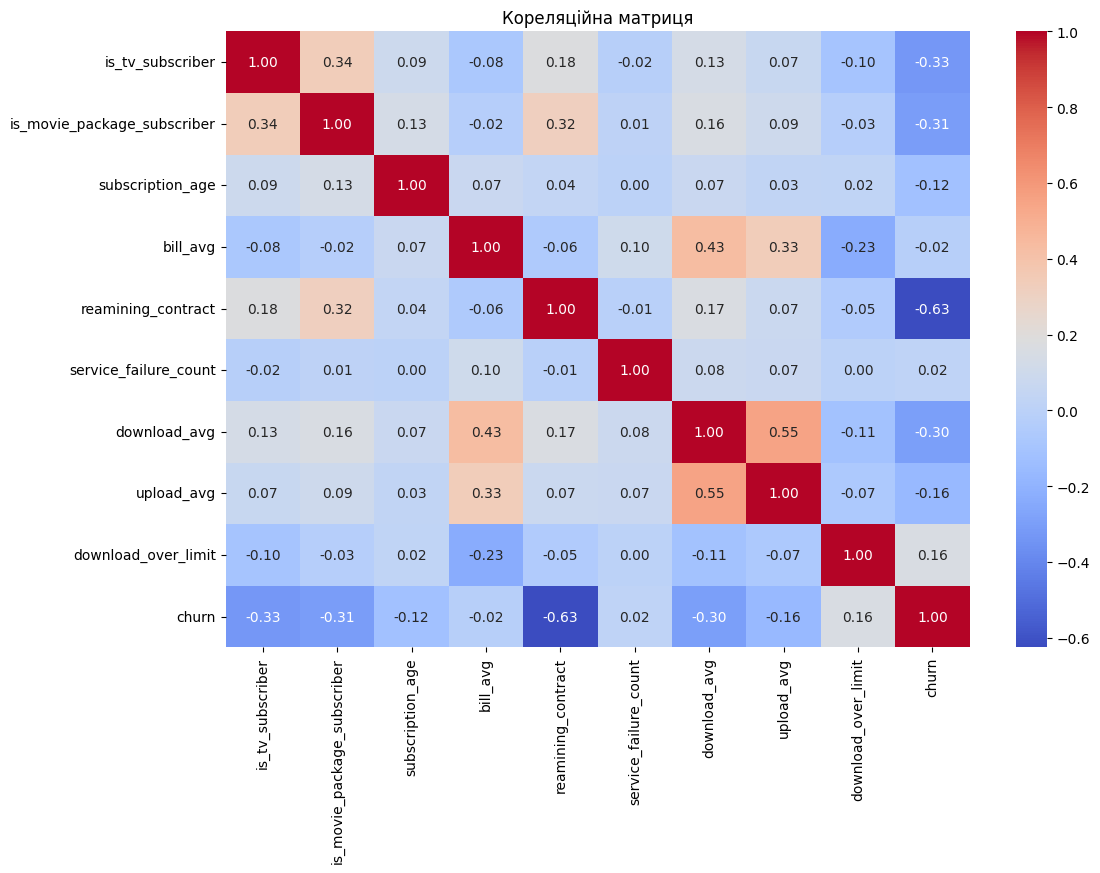

In [19]:
# Аналіз кореляцій (виключаємо "id")
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['id']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця')
plt.show()

Cпостерігається сильна негативна кореляція між reamining_contract та churn (-0.63), це говорить нам про те, що чим довший контракт тим меньша ймовірність відтоку клієнтів. Виглядає логічно.


Між download_avg та upload_avg кореляція позитивна (0.55) що теж логічно, оскільки активні користувачі як передають так і приймають великі обсяги даних. Хоч змінні між собою і корелюють, але можнв залишити обидві, оскільки кореляція не перевищує 0.8

bill_avg корелює з download_avg (0.43) та з  reamining_contract (0.33) що говорить нам про те що чим більший рахунок за останні три місяці отримує клієнт тим активніше він користується інтернетом абож без підписки або користується довгостроковими контрактами, оскільки також спостерігається негативна кореляція між  bill_avg та download_over_limit (-0.23)

is_tv_subscriber та churnб is_movie_package_subscriber та download_avg мають приблизно обнакову невисоку негативну кореляцію з churn. Це говорить про те що додаткові послуги та активне користування інтернетом привязують клієнтів та запобігають їх відтоку.